<a href="https://colab.research.google.com/github/MikkelUlv13/TelecomX-Churn-Analysis-P1/blob/main/TelecomX_Churn_Analysis_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extract

### Paso 1: Instalar y cargar librerías en Colab

In [1]:
# Instalación (por si faltan algunas librerías)
!pip install pandas matplotlib seaborn requests

# Importación de librerías principales
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Librerías cargadas correctamente")


✅ Librerías cargadas correctamente


### Paso 2: Cargar los datos desde la API

In [2]:
# URL del archivo JSON en GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Hacer la petición a la API
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
    print("✅ Datos cargados correctamente")
else:
    print("❌ Error al cargar datos")

# Mostrar primeras filas
df.head()


✅ Datos cargados correctamente


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Nombres de las columnas
print(df.columns)

# Primeras filas
df.head()

# Resumen de tipos de datos
df.info()

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


# Transform

### Paso 1: Explorar las columnas y sus tipos de datos

In [4]:
# Listado de columnas
print("Columnas del dataset:")
print(df.columns.tolist())

# Tipos de datos por columna
print("\nTipos de datos:")
print(df.dtypes)

# Resumen general del DataFrame
df.info()


Columnas del dataset:
['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

Tipos de datos:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


### Desanidar columnas

In [5]:
# Revisar el contenido de una fila
df.iloc[0].to_dict()


{'customerID': '0002-ORFBO',
 'Churn': 'No',
 'customer': {'gender': 'Female',
  'SeniorCitizen': 0,
  'Partner': 'Yes',
  'Dependents': 'Yes',
  'tenure': 9},
 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},
 'internet': {'InternetService': 'DSL',
  'OnlineSecurity': 'No',
  'OnlineBackup': 'Yes',
  'DeviceProtection': 'No',
  'TechSupport': 'Yes',
  'StreamingTV': 'Yes',
  'StreamingMovies': 'No'},
 'account': {'Contract': 'One year',
  'PaperlessBilling': 'Yes',
  'PaymentMethod': 'Mailed check',
  'Charges': {'Monthly': 65.6, 'Total': '593.3'}}}

In [6]:
# Revisar estructura de la columna "customer"
df["customer"].iloc[0]

# Revisar estructura de la columna "internet"
df["internet"].iloc[0]


{'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'Yes',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'No'}

### Valores ausentes

In [7]:
# Conteo de valores nulos por columna
df.isnull().sum()

# Porcentaje de valores nulos
(df.isnull().sum() / len(df)) * 100


,0
customerID,0.0
Churn,0.0
customer,0.0
phone,0.0
internet,0.0
account,0.0


### Duplicados

In [11]:
# Revisar duplicados en customerID
print("Duplicados en customerID:", df["customerID"].duplicated().sum())
# Revisar duplicados en todo el DataFrame convirtiendo dict → string
df_str = df.astype(str)
print("Duplicados totales:", df_str.duplicated().sum())


Duplicados en customerID: 0
Duplicados totales: 0


### Errores de formato

In [12]:
# Revisar una fila completa
df.iloc[0].to_dict()

{'customerID': '0002-ORFBO',
 'Churn': 'No',
 'customer': {'gender': 'Female',
  'SeniorCitizen': 0,
  'Partner': 'Yes',
  'Dependents': 'Yes',
  'tenure': 9},
 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},
 'internet': {'InternetService': 'DSL',
  'OnlineSecurity': 'No',
  'OnlineBackup': 'Yes',
  'DeviceProtection': 'No',
  'TechSupport': 'Yes',
  'StreamingTV': 'Yes',
  'StreamingMovies': 'No'},
 'account': {'Contract': 'One year',
  'PaperlessBilling': 'Yes',
  'PaymentMethod': 'Mailed check',
  'Charges': {'Monthly': 65.6, 'Total': '593.3'}}}

### Se encontrarón inconsistencias en “errores de formato”:

🔸 Variables anidadas → hay que “aplanar” (json_normalize) para que todo quede en columnas.

🔸 Cargos (TotalCharges) es string → debería ser numérico.

🔸 Categorías binarias → aparecen como 'Yes'/'No', conviene normalizarlas a 1/0 más adelante.

🔸 SeniorCitizen está en 0/1 → ya está numérico, perfecto.

In [14]:
from pandas import json_normalize
# Aplanar el Json
# Expandir las columnas anidadas
df_flat = pd.json_normalize(
    data,
    sep='_'
)

# Revisar estructura
df_flat.head()
df_flat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

### Inconsistencias en categorías

In [19]:
import pandas as pd

df_clean = df_flat.copy()

# --- 1) Cargos a numérico (por si no lo hiciste antes)
df_clean['account_Charges_Total'] = pd.to_numeric(
    df_clean['account_Charges_Total'], errors='coerce'
)

# --- 2) Detectar columnas binarias Yes/No (ignorando nulos y vacíos)
yn_cols = []
for col in df_clean.columns:
    vals = pd.Series(df_clean[col].dropna().astype(str).str.strip().unique())
    vals = set(vals[vals != ''])  # quitar vacíos
    if vals and vals.issubset({'Yes','No'}):
        yn_cols.append(col)

# Garantizar que Churn esté incluida
if 'Churn' in df_clean.columns and 'Churn' not in yn_cols:
    yn_cols.append('Churn')

print("Columnas Yes/No detectadas:", yn_cols)

# --- 3) Mapear Yes/No a 1/0 y convertir a Int8 (nullable)
for col in yn_cols:
    # Normalizar espacios y caso
    s = df_clean[col].astype(str).str.strip().str.title()
    # Pasar vacíos a NA
    s = s.replace({'': pd.NA})
    # Mapear
    s = s.replace({'Yes': 1, 'No': 0})
    # Convertir a entero nullable
    df_clean[col] = s.astype('Int8')

# --- 4) Checar si quedaron valores inesperados en columnas binarias
unexpected = {}
for col in yn_cols:
    bad = df_clean[col][~df_clean[col].isin([0,1]) & df_clean[col].notna()]
    if len(bad):
        unexpected[col] = bad.unique().tolist()

print("Valores inesperados (debería estar vacío):", unexpected)

# --- 5) Resumen rápido
print("\n📦 dtypes finales (muestra):")
print(df_clean.dtypes.head(12))
print("\n🎯 Distribución de Churn:")
print(df_clean['Churn'].value_counts(dropna=False, normalize=True).round(3))


Columnas Yes/No detectadas: ['Churn', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'account_PaperlessBilling']
Valores inesperados (debería estar vacío): {}

📦 dtypes finales (muestra):
customerID                  object
Churn                         Int8
customer_gender             object
customer_SeniorCitizen       int64
customer_Partner              Int8
customer_Dependents           Int8
customer_tenure              int64
phone_PhoneService            Int8
phone_MultipleLines         object
internet_InternetService    object
internet_OnlineSecurity     object
internet_OnlineBackup       object
dtype: object

🎯 Distribución de Churn:
Churn
0       0.712
1       0.257
<NA>    0.031
Name: proportion, dtype: Float64


/tmp/ipython-input-1678802142.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  s = s.replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-1678802142.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  s = s.replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-1678802142.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [20]:
# Revisar valores únicos por columna en df_clean
for col in df_clean.columns:
    print(f"\nColumna: {col}")
    print(df_clean[col].unique()[:10])  # muestra hasta 10 valores únicos
    print("Total de valores únicos:", df_clean[col].nunique())



Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
Total de valores únicos: 7267

Columna: Churn
<IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int8
Total de valores únicos: 2

Columna: customer_gender
['Female' 'Male']
Total de valores únicos: 2

Columna: customer_SeniorCitizen
[0 1]
Total de valores únicos: 2

Columna: customer_Partner
<IntegerArray>
[1, 0]
Length: 2, dtype: Int8
Total de valores únicos: 2

Columna: customer_Dependents
<IntegerArray>
[1, 0]
Length: 2, dtype: Int8
Total de valores únicos: 2

Columna: customer_tenure
[ 9  4 13  3 71 63  7 65 54 72]
Total de valores únicos: 73

Columna: phone_PhoneService
<IntegerArray>
[1, 0]
Length: 2, dtype: Int8
Total de valores únicos: 2

Columna: phone_MultipleLines
['No' 'Yes' 'No phone service']
Total de valores únicos: 3

Columna: internet_InternetService
['DSL' 'Fiber optic' 'No']
Total de valores únicos: 3

Columna: internet_

### Creación de columna "Cuentas diarias"

In [21]:
# Crear la nueva columna
df_clean['Cuentas_Diarias'] = (df_clean['account_Charges_Monthly'] / 30).round(2)

# Verificar
df_clean[['account_Charges_Monthly', 'Cuentas_Diarias']].head()


,account_Charges_Monthly,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


### Estandarización y transformación de datos

In [22]:
# Diccionario de renombrado
rename_dict = {
    'customer_tenure': 'Antiguedad_Meses',
    'account_Charges_Monthly': 'Cargo_Mensual',
    'account_Charges_Total': 'Cargo_Total',
    'Cuentas_Diarias': 'Cargo_Diario',
    'Churn': 'Evasion',
    'customer_gender': 'Genero',
    'customer_SeniorCitizen': 'AdultoMayor',
    'customer_Partner': 'Tiene_Pareja',
    'customer_Dependents': 'Dependientes',
    'phone_PhoneService': 'Servicio_Telefono',
    'phone_MultipleLines': 'Lineas_Multiples',
    'internet_InternetService': 'Servicio_Internet',
    'internet_OnlineSecurity': 'Seguridad_Online',
    'internet_OnlineBackup': 'Respaldo_Online',
    'internet_DeviceProtection': 'Proteccion_Dispositivo',
    'internet_TechSupport': 'Soporte_Tecnico',
    'internet_StreamingTV': 'Streaming_TV',
    'internet_StreamingMovies': 'Streaming_Peliculas',
    'account_Contract': 'Tipo_Contrato',
    'account_PaperlessBilling': 'Factura_Digital',
    'account_PaymentMethod': 'Metodo_Pago'
}

# Renombrar columnas
df_clean = df_clean.rename(columns=rename_dict)

# Verificar resultado
df_clean.head()

,customerID,Evasion,Genero,AdultoMayor,Tiene_Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


# Load (carga y análisis)

### Análisis descriptivo
Estadísticas descriptivas con Pandas

In [23]:
# Estadísticas básicas (numéricas)
df_clean.describe().T


,count,mean,std,min,25%,50%,75%,max
Evasion,7043.0,0.26537,0.441561,0.0,0.0,0.0,1.0,1.0
AdultoMayor,7267.0,0.162653,0.369074,0.0,0.0,0.0,0.0,1.0
Tiene_Pareja,7267.0,0.484106,0.499782,0.0,0.0,0.0,1.0,1.0
Dependientes,7267.0,0.300124,0.458343,0.0,0.0,0.0,1.0,1.0
Antiguedad_Meses,7267.0,32.346498,24.571773,0.0,9.0,29.0,55.0,72.0
Servicio_Telefono,7267.0,0.902711,0.296371,0.0,1.0,1.0,1.0,1.0
Factura_Digital,7267.0,0.59323,0.491265,0.0,0.0,1.0,1.0,1.0
Cargo_Mensual,7267.0,64.720098,30.129572,18.25,35.425,70.3,89.875,118.75
Cargo_Total,7256.0,2280.634213,2268.632997,18.8,400.225,1391.0,3785.3,8684.8
Cargo_Diario,7267.0,2.157292,1.004407,0.61,1.18,2.34,2.995,3.96


In [24]:
# Estadísticas de variables categóricas para todas las columnas (incluyendo categóricas)
df_clean.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7267,7267,9995-HOTOH,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Evasion,7043.0,<NA>,<NA>,<NA>,0.26537,0.441561,0.0,0.0,0.0,1.0,1.0
Genero,7267,2,Male,3675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdultoMayor,7267.0,NaN,NaN,NaN,0.162653,0.369074,0.0,0.0,0.0,0.0,1.0
Tiene_Pareja,7267.0,<NA>,<NA>,<NA>,0.484106,0.499782,0.0,0.0,0.0,1.0,1.0
Dependientes,7267.0,<NA>,<NA>,<NA>,0.300124,0.458343,0.0,0.0,0.0,1.0,1.0
Antiguedad_Meses,7267.0,NaN,NaN,NaN,32.346498,24.571773,0.0,9.0,29.0,55.0,72.0
Servicio_Telefono,7267.0,<NA>,<NA>,<NA>,0.902711,0.296371,0.0,1.0,1.0,1.0,1.0
Lineas_Multiples,7267,3,No,3495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Servicio_Internet,7267,3,Fiber optic,3198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Media, mediana y desviación estándar de las variables numéricas más relevantes
cols_numericas = ['Antiguedad_Meses', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario']

for col in cols_numericas:
    print(f"\n📊 {col}")
    print("Media:", df_clean[col].mean())
    print("Mediana:", df_clean[col].median())
    print("Desv. Estándar:", df_clean[col].std())
    print("Mínimo:", df_clean[col].min())
    print("Máximo:", df_clean[col].max())



📊 Antiguedad_Meses
Media: 32.34649786707032
Mediana: 29.0
Desv. Estándar: 24.571772888767292
Mínimo: 0
Máximo: 72

📊 Cargo_Mensual
Media: 64.72009770194028
Mediana: 70.3
Desv. Estándar: 30.12957188566699
Mínimo: 18.25
Máximo: 118.75

📊 Cargo_Total
Media: 2280.6342130650496
Mediana: 1391.0
Desv. Estándar: 2268.6329969266067
Mínimo: 18.8
Máximo: 8684.8

📊 Cargo_Diario
Media: 2.157291867345535
Mediana: 2.34
Desv. Estándar: 1.004406798729517
Mínimo: 0.61
Máximo: 3.96


### Distribución de evasión

In [26]:
# Conteo absoluto y porcentual
print(df_clean['Evasion'].value_counts())
print("\nProporción (%):")
print(df_clean['Evasion'].value_counts(normalize=True).round(3)*100)


Evasion
0    5174
1    1869
Name: count, dtype: Int64

Proporción (%):
Evasion
0    73.5
1    26.5
Name: proportion, dtype: Float64


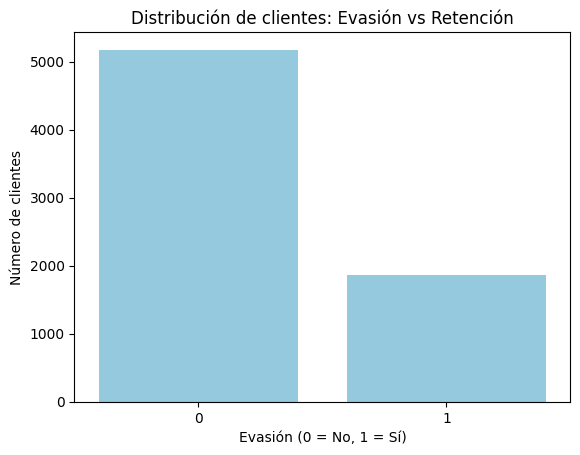

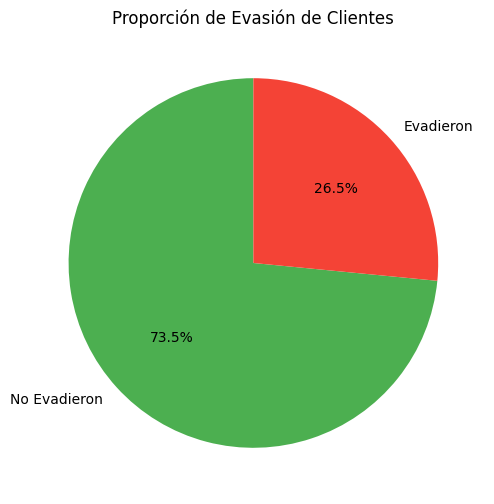

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barras
sns.countplot(x='Evasion', data=df_clean, color='skyblue')
plt.title("Distribución de clientes: Evasión vs Retención")
plt.xlabel("Evasión (0 = No, 1 = Sí)")
plt.ylabel("Número de clientes")
plt.show()


# Conteo
counts = df_clean['Evasion'].value_counts(normalize=True)

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(counts, labels=['No Evadieron','Evadieron'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50','#F44336'])
plt.title("Proporción de Evasión de Clientes")
plt.show()


### Recuento de evasión por variables categóricas
ya estandarizado (df_clean), las más interesantes son:

Genero (customer_gender)

Tipo_Contrato (account_Contract)

Metodo_Pago (account_PaymentMethod)

Servicio_Internet (internet_InternetService)

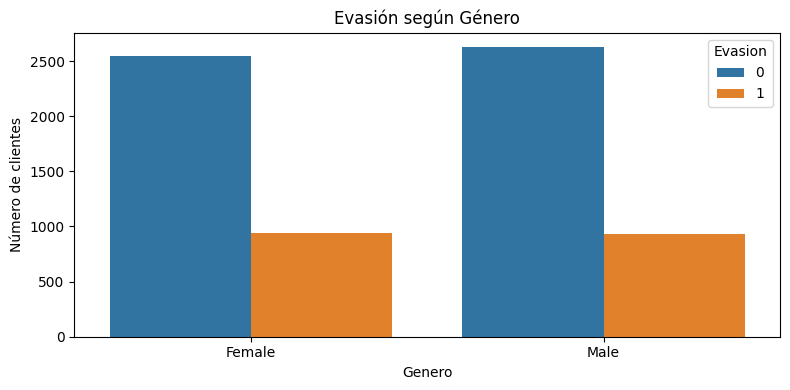

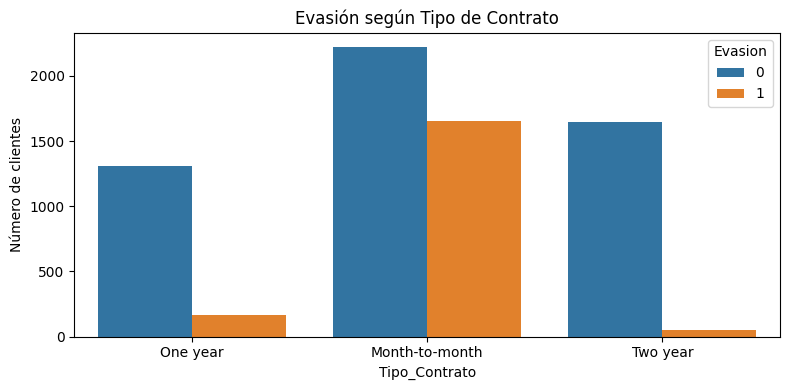

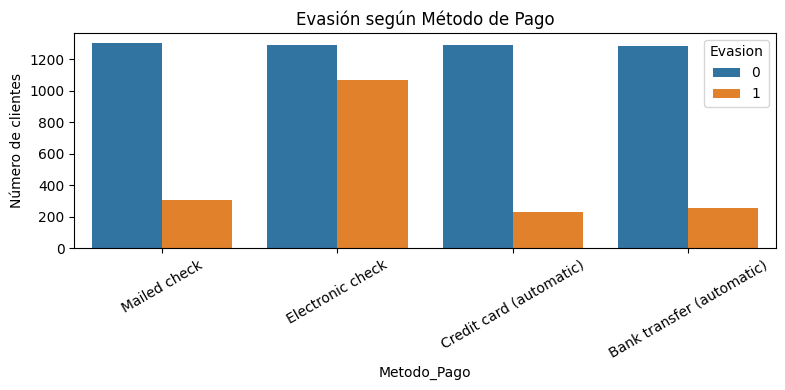

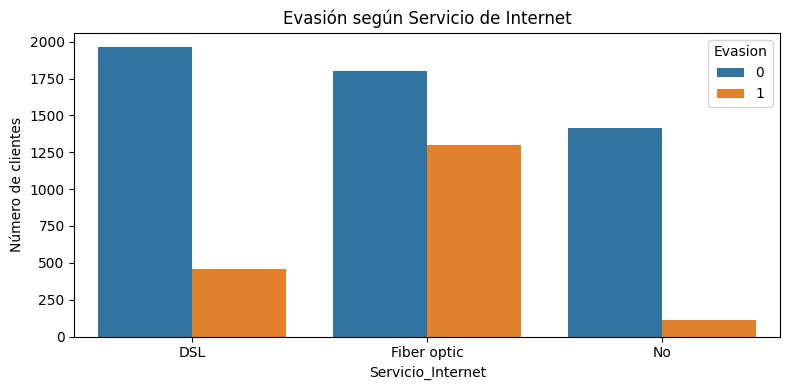

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Detectar nombres según existan (ES o EN)
target = 'Evasion' if 'Evasion' in df_clean.columns else 'Churn'
sexo   = 'Genero' if 'Genero' in df_clean.columns else 'customer_gender'
contr  = 'Tipo_Contrato' if 'Tipo_Contrato' in df_clean.columns else 'account_Contract'
pago   = 'Metodo_Pago' if 'Metodo_Pago' in df_clean.columns else 'account_PaymentMethod'
inet   = 'Servicio_Internet' if 'Servicio_Internet' in df_clean.columns else 'internet_InternetService'

def safe_countplot(df, xcol, huecol=target, rot=0, title=""):
    # Quitar filas con NaN en las columnas relevantes para evitar errores
    tmp = df[[xcol, huecol]].dropna()
    plt.figure(figsize=(8,4))
    # Usar 'hue' correctamente; evitar 'palette' sin hue
    sns.countplot(data=tmp, x=xcol, hue=huecol)
    plt.title(title)
    plt.ylabel("Número de clientes")
    plt.xticks(rotation=rot)
    plt.tight_layout()
    plt.show()

# 1) Evasión vs Género
safe_countplot(df_clean, sexo, title="Evasión según Género")

# 2) Evasión vs Tipo de Contrato
safe_countplot(df_clean, contr, title="Evasión según Tipo de Contrato")

# 3) Evasión vs Método de Pago
safe_countplot(df_clean, pago, rot=30, title="Evasión según Método de Pago")

# 4) Evasión vs Servicio de Internet
safe_countplot(df_clean, inet, title="Evasión según Servicio de Internet")



In [36]:
# Comprobar nombres de las listas
sorted(df_clean.columns.tolist())

['AdultoMayor',
 'Antiguedad_Meses',
 'Cargo_Diario',
 'Cargo_Mensual',
 'Cargo_Total',
 'Dependientes',
 'Evasion',
 'Factura_Digital',
 'Genero',
 'Lineas_Multiples',
 'Metodo_Pago',
 'Proteccion_Dispositivo',
 'Respaldo_Online',
 'Seguridad_Online',
 'Servicio_Internet',
 'Servicio_Telefono',
 'Soporte_Tecnico',
 'Streaming_Peliculas',
 'Streaming_TV',
 'Tiene_Pareja',
 'Tipo_Contrato',
 'customerID']

### Conteo de evasión por variables numéricas

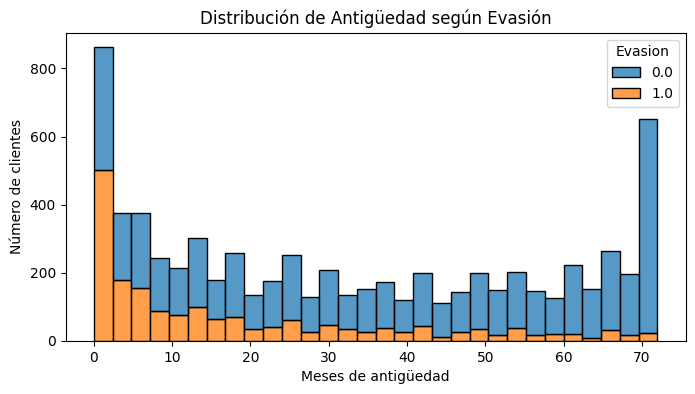

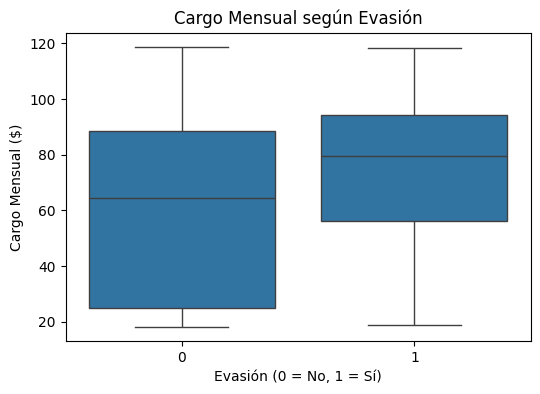

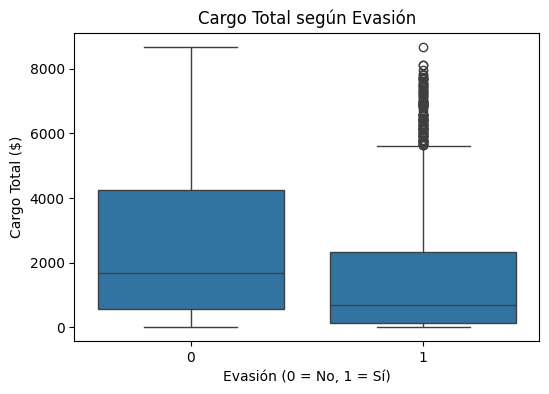

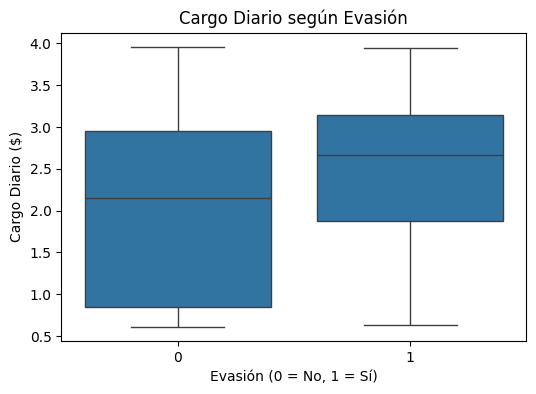

In [38]:
# 1. Antigüedad (tenure) vs Evasión

plt.figure(figsize=(8,4))
sns.histplot(data=df_clean, x='Antiguedad_Meses', hue='Evasion', multiple='stack', bins=30)
plt.title("Distribución de Antigüedad según Evasión")
plt.xlabel("Meses de antigüedad")
plt.ylabel("Número de clientes")
plt.show()

# 2. Cargo Mensual vs Evasión

plt.figure(figsize=(6,4))
sns.boxplot(data=df_clean, x='Evasion', y='Cargo_Mensual')
plt.title("Cargo Mensual según Evasión")
plt.xlabel("Evasión (0 = No, 1 = Sí)")
plt.ylabel("Cargo Mensual ($)")
plt.show()

# 3. Cargo Total vs Evasión

plt.figure(figsize=(6,4))
sns.boxplot(data=df_clean, x='Evasion', y='Cargo_Total')
plt.title("Cargo Total según Evasión")
plt.xlabel("Evasión (0 = No, 1 = Sí)")
plt.ylabel("Cargo Total ($)")
plt.show()

# 4. Cargo Diario vs Evasión

plt.figure(figsize=(6,4))
sns.boxplot(data=df_clean, x='Evasion', y='Cargo_Diario')
plt.title("Cargo Diario según Evasión")
plt.xlabel("Evasión (0 = No, 1 = Sí)")
plt.ylabel("Cargo Diario ($)")
plt.show()


# Informe FInal

# 📄 Informe – Challenge Telecom X (Parte 1)

## 1. Introducción
Este análisis aborda la **evasión de clientes (churn)** en Telecom X. El objetivo fue obtener datos desde la API,
aplicar **ETL** y realizar un **EDA** para identificar patrones que orienten estrategias de retención.

## 2. Limpieza y Tratamiento de Datos
- Extracción desde API JSON y normalización (aplanado de estructuras anidadas).
- Conversión de variables binarias **Yes/No → 1/0** (incluida la variable objetivo).
- Conversión de cargos a numérico y creación de **Cargo_Diario**.
- Revisión y tratamiento de duplicados y nulos.
- Renombrado/estandarización de columnas para claridad.

## 3. Análisis Exploratorio de Datos
- **Distribución de Evasión:** (inserta gráfico de barras/pie).
- **Evasión por Tipo de Contrato:** (inserta gráfico).
- **Evasión por Método de Pago:** (inserta gráfico).
- **Evasión por Servicio de Internet:** (inserta gráfico).
- **Evasión vs Antigüedad:** (histograma por buckets o boxplot).

## 4. Conclusiones e Insights
- Tasa de evasión observada: **X%**.
- Mayor churn en: **[contratos / métodos / servicios]**.
- Antigüedad baja → mayor probabilidad de churn.
- Sensibilidad a **cargos mensuales/diarios** en ciertos segmentos.

## 5. Recomendaciones
1. Ofertas de permanencia y upgrades en **contrato mensual** y **clientes nuevos**.
2. Fomentar **métodos de pago automáticos** (bonos/beneficios).
3. Paquetes con **soporte/seguridad online** en segmentos de mayor churn.
4. **Alertas tempranas** para clientes con alto cargo mensual/diario en los primeros 12 meses.
5. Plan de **retención 30-60-90 días** con comunicaciones segmentadas.
